# Analysis project 2

Same teams as project 1

Add your solution notebook(s) to the analysis1 git repo

**Don't forget to update the README.md with team member names as in the previous projects.** 

Hopefully this can be completed in class today.  But we'll accept uploads on github up to 3pm Saturday.

In [227]:
import ROOT as R

## A word on data analysis in the real world.

### Signal and background

No data set is perfectly measured or perfectly pure.  For example the figure below if from an [analysis](http://cms-results.web.cern.ch/cms-results/public-results/publications/SMP-13-004/index.html) designed to measure the production of $Z$ bosons by the CMS experiment.  Events with two electrons are selected and the mass formed by summing the 4-vectors of those electrons is shown.

<CENTER><img src="http://cms-results.web.cern.ch/cms-results/public-results/publications/SMP-13-004/CMS-SMP-13-004_Figure_001.png" style="width:30%"></CENTER>

Not all events with two electrons are from $Z$ decays.  In general there are numerous physical processes that can mimic any final state you choose to study.  For example the following process can produce an event with two electrons:
* $Z\to e^+e^-$
* $W^\pm Z\to e^\pm\nu_e e^+e^-$ 
* $ZZ\to 2 (or~4)$ electrons 
* $t\bar t\to W^+\bar b + W^-b \to e^+\nu_e b + e^-\bar\nu_e\bar b$  (dominant "background" process)
* $W^+W^-\to e^+\nu_e + e^-\bar\nu_e$
* $W^+W^-\to \tau^+\nu_\tau + \tau^-\bar\nu_\tau, \tau^+\to e^+\nu_e, \tau^-\to e^-\bar\nu_e$
* Various cases where some other object, like a jet is misidentified as an electron

In the figure we can see that the yellow area is associated with background from top quark pair production.  Background events passing our selection criteria for signal need to be subtracted to make a proper signal measurement. 

If the background is well understood, we can model the it using a simulation and subtract the expected distribution from the data, after carefully calculating the proper normalization or by _fitting_ it to obtain the normalization from data.  A fitting proceedure can be used to simultaneously adjust the normalizations of BOTH signal and background to find an optimal representation of the data.  This approach is applied in the plot above.

Here is a more complex example where numerous backgrounds are considered to be significant:
<CENTER><img src="http://cms-results.web.cern.ch/cms-results/public-results/publications/SMP-19-011/CMS-SMP-19-011_Figure_001.png" style="width:20%">
<img src="http://cms-results.web.cern.ch/cms-results/public-results/publications/SMP-19-011/CMS-SMP-19-011_Figure_004-c.png" style="width:30%">
</CENTER>



In some cases if the background is relatively smooth and not too quickly varying, we we estimate the background from an emperical fit.  This approach is adopted by ATLAS in to estimate the size of the Higgs boson peak inthe plot below.  The integral of the _background subtracted_ hitogram gives the number of observed Higgs bosons and can be used to estimate its producton rate.

<CENTER><img src="http://opendata.atlas.cern/release/2020/documentation/physics/pictures/fig_12b.png" style="width:30%"></CENTER>

As you can see here the signal is samall fraction of the total data.  But a small indication of a "Higgs bump" can be found if the background function is assumed to be smooth.

A proper background estimate, particularly in the presence of multiple backgrounds requires more technology that we have covered.  PArticle discover get even more interesting when some of the decay products are invisible!  But, we'll leave that for a future class and finish this JTERM with some other studies of signal reconstruction from visible particles!  

# Project: Higgs to ZZ

The Higgs boson has an extremely rich phenomonology.  Spend a few minutes reading over the short introduction [here](http://opendata.atlas.cern/release/2020/documentation/physics/the-higgs-boson.html.)

The following two files contrain simulated Higgs boson events.  In each case the Higgs decays as $H\to ZZ\to 4~leptons$
* /project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root
* /project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_344235.VBFH125_ZZ4lep.4lep.root

For simplicity you can add the events from these two signal files to form your total signal sample used in the following study.

## 1. Reconstruct $m_H$ from the leptons 
If you are counting GeV's of mass when you think of the process $H\to ZZ\to 4\ell$, you'll notice that $m_H\simeq 125\,GeV < 2m_Z\simeq 182\,GeV$!  Yes that's possible, nature is weird like that! One Z will be "on-shell" with a mass close to the expected value, while the other will be at a mass lower than expected for $m_Z$.  

In [27]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root")
fMCproj1.ls()

tree = fMCproj1.Get("mini")

TFile**		/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root	
 TFile*		/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root	
  KEY: TTree	mini;1	mini


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
True
True
True


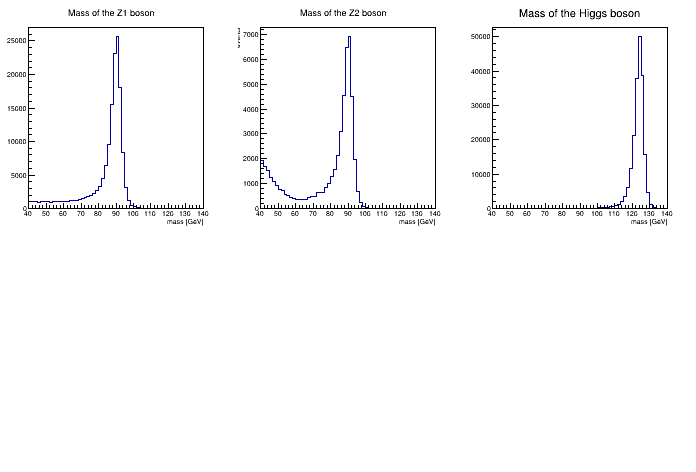

In [23]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root")
#fMCproj1.ls()
tree1 = fMCproj1.Get("mini")
fMCproj2 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_344235.VBFH125_ZZ4lep.4lep.root")
tree2 = fMCproj2.Get("mini")
trees = [tree1,tree2]

maxevents = 100000

recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hmZ1 = R.TH1F("hmZ1","Mass of the Z1 boson; mass [GeV]; events",60,40,140)
hmZ2 = R.TH1F("hmZ2","Mass of the Z2 boson; mass [GeV]; events",60,40,140)
hmZ3 = R.TH1F("hmZ3","Mass of the Higgs boson; mass [GeV]; events",60,40,140)
hmZ4 = R.TH1F("hmZ4","TEMP; TEMP [GeV]; events",60,40,140)
hmZ5 = R.TH1F("hmZ5","TEMP; TEMP [GeV]; events",60,40,140)
hmZ6 = R.TH1F("hmZ6","TEMP; TEMP [GeV]; events",60,40,140)

hmZ1.Reset()
hmZ2.Reset()
hmZ3.Reset()
hmZ4.Reset()
hmZ5.Reset()
hmZ6.Reset()

Lepton1  = R.TLorentzVector()
Lepton2 = R.TLorentzVector()
Lepton3  = R.TLorentzVector()
Lepton4 = R.TLorentzVector()
z1  = R.TLorentzVector()
z2  = R.TLorentzVector()
zcand  = R.TLorentzVector()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree1:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    Lepton1.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    Lepton2.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    Lepton3.SetPtEtaPhiE(event.lep_pt[2]/1000, event.lep_eta[2], event.lep_phi[2], event.lep_E[2]/1000)
    Lepton4.SetPtEtaPhiE(event.lep_pt[3]/1000, event.lep_eta[3], event.lep_phi[3], event.lep_E[3]/1000)
    
    z1 = Lepton1 + Lepton2
    z2 = Lepton3 + Lepton4
    
    if(z1.Pt() > z2.Pt()):
        hmZ1.Fill(z1.M())
        hmZ2.Fill(z2.M())
    else:
        hmZ2.Fill(z1.M())
        hmZ1.Fill(z2.M())

    
    zcand = z1 + z2
    
    hmZ3.Fill(zcand.M())
    
    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    #if event.jet_n>0: 
        #hptj1.Fill(event.jet_pt[0]/1000)
        #hptallj.Fill(recoil.Pt())
        #if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        #hdphi.Fill(zcand.DeltaPhi(recoil))
    
    #hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0
        
for event in tree2:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    Lepton1.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    Lepton2.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    Lepton3.SetPtEtaPhiE(event.lep_pt[2]/1000, event.lep_eta[2], event.lep_phi[2], event.lep_E[2]/1000)
    Lepton4.SetPtEtaPhiE(event.lep_pt[3]/1000, event.lep_eta[3], event.lep_phi[3], event.lep_E[3]/1000)
    
    z1 = Lepton1 + Lepton2
    z2 = Lepton3 + Lepton4
    
    if(z1.Pt() > z2.Pt()):
        hmZ4.Fill(z1.M())
        hmZ5.Fill(z2.M())
    else:
        hmZ5.Fill(z1.M())
        hmZ6.Fill(z2.M())

    
    zcand = z1 + z2
    
    hmZ6.Fill(zcand.M())
    
    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    #if event.jet_n>0: 
        #hptj1.Fill(event.jet_pt[0]/1000)
        #hptallj.Fill(recoil.Pt())
        #if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        #hdphi.Fill(zcand.DeltaPhi(recoil))
    
    #hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break
        
        
        
c3=R.TCanvas()
c3.Divide(3,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

print(hmZ1.Add(hmZ4,1))
print(hmZ2.Add(hmZ5,1))
print(hmZ3.Add(hmZ6,1))

c3.cd(1)
hmZ1.Draw()
c3.cd(2)
hmZ2.Draw()
c3.cd(3)
hmZ3.Draw()
#c3.cd(4)
#hmZ4.Draw()
#c3.cd(5)
#hmZ5.Draw()
#c3.cd(6)
#hmZ6.Draw()
#c3.cd(4).SetLogy()
#hptallj.SetLineColor(R.kRed)
#hptZ.Draw()
#hptallj.Draw("same")
#c3.cd(5).SetLogy()
#hptj1.Draw()
#hptj2.SetLineStyle(2)
#hptj2.Draw("same")
#c3.cd(6)
#hdphi.Draw()
c3.Draw()


## 2. Compare to ZZ to 4lepton sample
Recall your study of the $ZZ\to 4\ell$ sample from yesterday.

* /project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root

Normalize this sample to the same number of events found in the $H\to ZZ\to 4\ell$ sample.  And make a plot or plots to demonstrate how you might separate the __continuous__ $ZZ$ background from the __resonant__ $H\to ZZ$ signal.

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


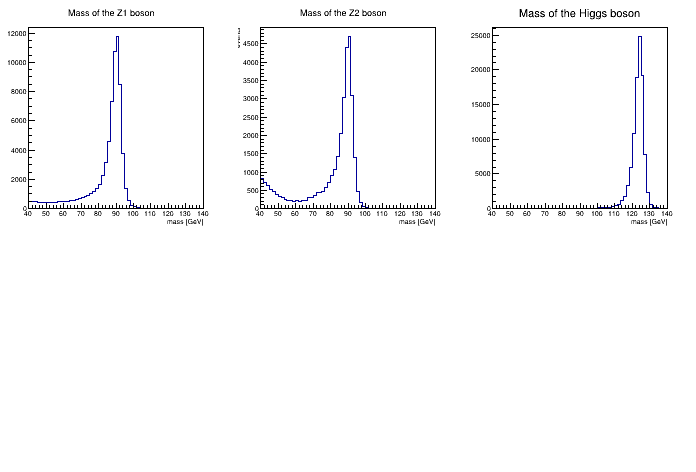

In [22]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root")
tree1 = fMCproj1.Get("mini")
fMCproj2 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_344235.VBFH125_ZZ4lep.4lep.root")
tree2 = fMCproj2.Get("mini")
fMCproj3 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root")
tree3 = fMCproj2.Get("mini")

maxevents = 100000

recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hmZ1 = R.TH1F("hmZ1","Mass of the Z1 boson; mass [GeV]; events",60,40,140)
hmZ2 = R.TH1F("hmZ2","Mass of the Z2 boson; mass [GeV]; events",60,40,140)
hmZ3 = R.TH1F("hmZ3","Mass of the Higgs boson; mass [GeV]; events",60,40,140)
hmZ4 = R.TH1F("hmZ4","TEMP; TEMP [GeV]; events",60,40,140)
hmZ5 = R.TH1F("hmZ5","TEMP; TEMP [GeV]; events",60,40,140)
hmZ6 = R.TH1F("hmZ6","TEMP; TEMP [GeV]; events",60,40,140)
hmZ7 = R.TH1F("hmZ7","TEMP; TEMP [GeV]; events",60,40,140)
hmZ8 = R.TH1F("hmZ8","TEMP; TEMP [GeV]; events",60,40,140)
hmZ9 = R.TH1F("hmZ9","TEMP; TEMP [GeV]; events",60,40,140)

hmZ1.Reset()
hmZ2.Reset()
hmZ3.Reset()
hmZ4.Reset()
hmZ5.Reset()
hmZ6.Reset()
hmZ7.Reset()
hmZ8.Reset()
hmZ9.Reset()

Lepton1  = R.TLorentzVector()
Lepton2 = R.TLorentzVector()
Lepton3  = R.TLorentzVector()
Lepton4 = R.TLorentzVector()
z1  = R.TLorentzVector()
z2  = R.TLorentzVector()
zcand  = R.TLorentzVector()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree1:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    Lepton1.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    Lepton2.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    Lepton3.SetPtEtaPhiE(event.lep_pt[2]/1000, event.lep_eta[2], event.lep_phi[2], event.lep_E[2]/1000)
    Lepton4.SetPtEtaPhiE(event.lep_pt[3]/1000, event.lep_eta[3], event.lep_phi[3], event.lep_E[3]/1000)
    
    z1 = Lepton1 + Lepton2
    z2 = Lepton3 + Lepton4
    
    if(z1.Pt() > z2.Pt()):
        hmZ1.Fill(z1.M())
        hmZ2.Fill(z2.M())
    else:
        hmZ2.Fill(z1.M())
        hmZ1.Fill(z2.M())

    
    zcand = z1 + z2
    
    hmZ3.Fill(zcand.M())
    
    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    #if event.jet_n>0: 
        #hptj1.Fill(event.jet_pt[0]/1000)
        #hptallj.Fill(recoil.Pt())
        #if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        #hdphi.Fill(zcand.DeltaPhi(recoil))
    
    #hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0
        
for event in tree2:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    Lepton1.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    Lepton2.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    Lepton3.SetPtEtaPhiE(event.lep_pt[2]/1000, event.lep_eta[2], event.lep_phi[2], event.lep_E[2]/1000)
    Lepton4.SetPtEtaPhiE(event.lep_pt[3]/1000, event.lep_eta[3], event.lep_phi[3], event.lep_E[3]/1000)
    
    z1 = Lepton1 + Lepton2
    z2 = Lepton3 + Lepton4
    
    if(z1.Pt() > z2.Pt()):
        hmZ4.Fill(z1.M())
        hmZ5.Fill(z2.M())
    else:
        hmZ5.Fill(z1.M())
        hmZ6.Fill(z2.M())

    
    zcand = z1 + z2
    
    hmZ6.Fill(zcand.M())
    
    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    #if event.jet_n>0: 
        #hptj1.Fill(event.jet_pt[0]/1000)
        #hptallj.Fill(recoil.Pt())
        #if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        #hdphi.Fill(zcand.DeltaPhi(recoil))
    
    #hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break
        
if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree3:
    # Cut #1: At least 2 leptons
    if event.lep_n < 2: continue
    
    # Cut #2: Leptons with opposite charge
    if (event.lep_charge[0] == event.lep_charge[1]): continue
            
    # Cut #3: Leptons of the same family (2 electrons or 2 muons)
    if (event.lep_type[0] != event.lep_type[1]): continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    Lepton1.SetPtEtaPhiE(event.lep_pt[0]/1000, event.lep_eta[0], event.lep_phi[0], event.lep_E[0]/1000)
    Lepton2.SetPtEtaPhiE(event.lep_pt[1]/1000, event.lep_eta[1], event.lep_phi[1], event.lep_E[1]/1000)
    Lepton3.SetPtEtaPhiE(event.lep_pt[2]/1000, event.lep_eta[2], event.lep_phi[2], event.lep_E[2]/1000)
    Lepton4.SetPtEtaPhiE(event.lep_pt[3]/1000, event.lep_eta[3], event.lep_phi[3], event.lep_E[3]/1000)
    
    z1 = Lepton1 + Lepton2
    z2 = Lepton3 + Lepton4
    
    if(z1.Pt() > z2.Pt()):
        hmZ7.Fill(z1.M())
        hmZ8.Fill(z2.M())
    else:
        hmZ8.Fill(z1.M())
        hmZ9.Fill(z2.M())

    
    zcand = z1 + z2
    
    hmZ9.Fill(zcand.M())
    
    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    #if event.jet_n>0: 
        #hptj1.Fill(event.jet_pt[0]/1000)
        #hptallj.Fill(recoil.Pt())
        #if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        #hdphi.Fill(zcand.DeltaPhi(recoil))
    
    #hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break
    
    
        
c3=R.TCanvas()
c3.Divide(3,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

hmZ1.Add(hmZ4,1)
hmZ2.Add(hmZ5,1)
hmZ3.Add(hmZ6,1)

hmZ1.Add(hmZ7,-1)
hmZ2.Add(hmZ8,-1)
hmZ3.Add(hmZ9,-1)


c3.cd(1)
hmZ1.Draw()
c3.cd(2)
hmZ2.Draw()
c3.cd(3)
hmZ3.Draw()
#c3.cd(4)
#hmZ7.Draw()
#c3.cd(5)
#hmZ8.Draw()
#c3.cd(6)
#hmZ9.Draw()
c3.Draw()


## 3. Compare ZZ to gamma gamma (photons) channel

Finally the following file contains simulated events for the process $H\to\gamma\gamma$

* /project/phys5630/opendata.cern/atlas-opendata/samples/2020/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root

How does the resolution of your mass reconstruction for $H\to\gamma\gamma$ commpare to the 4 lepton channel?

In [15]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root")
tree = fMCproj1.Get("mini")
maxevents = 100000


fMCproj1.ls()

tree.Print()

TFile**		/project/phys5630/opendata.cern/atlas-opendata/samples/2020/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root	
 TFile*		/project/phys5630/opendata.cern/atlas-opendata/samples/2020/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root	
  OBJ: TTree	mini	mini : 0 at: 0x5651b2fd9190
  KEY: TTree	mini;1	mini
******************************************************************************
*Tree    :mini      : mini                                                   *
*Entries :  1054711 : Total =      1024554145 bytes  File  Size =  218481412 *
*        :          : Tree compression factor =   4.53                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1054711 : Total  Size=    4219993 bytes  File Size  =      18246 *
*Baskets :        6 : Basket Size=    1988096 bytes  Compression= 198.51     *
*................................................................

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
The Higgs mass derived from photons is in close correspondence with the mass derived in parts 1 and 2.


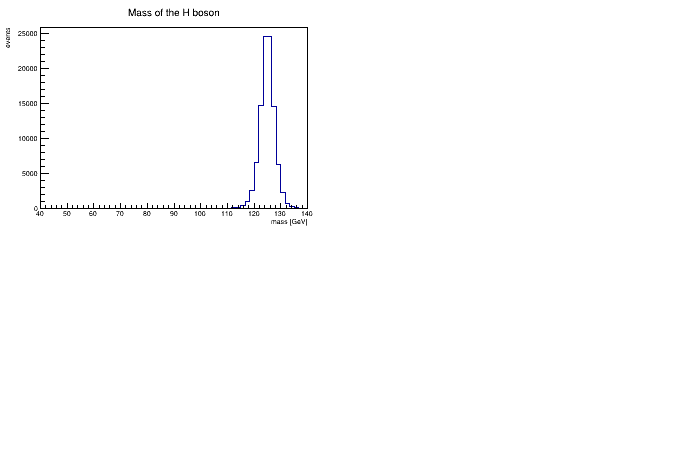

In [21]:
import ROOT as R
from math import pi

fMCproj1 = R.TFile("/project/phys5630/opendata.cern/atlas-opendata/samples/2020/GamGam/MC/mc_343981.ggH125_gamgam.GamGam.root")
tree = fMCproj1.Get("mini")
maxevents = 100000

recoil = R.TLorentzVector()
v4tmp  = R.TLorentzVector()

hmZ = R.TH1F("hmZ","Mass of the H boson; mass [GeV]; events",60,40,140)

hptj1 = R.TH1F("hptj1","pT of leading jet;pT [GeV];events/bin",100,0,400)
hptj2 = R.TH1F("hptj2","pT of secondary jet;pT [GeV];events/bin",100,0,400)
hptallj = R.TH1F("hptallj","Sum pT of all jets (recoil);pT [GeV];events/bin",100,0,400)
hptZ = R.TH1F("hptZ","pT of Z;pT [GeV];events/bin",100,0,400)
hdphi = R.TH1F("hdphi","#Delta#phi(Z,recoil); events/bin",60,0,pi)

hmZ.Reset()
hptj1.Reset()
hptj2.Reset()
hptallj.Reset()
hptZ.Reset()
hdphi.Reset()

leadPhoton  = R.TLorentzVector()
trailPhoton = R.TLorentzVector()
zcand  = R.TLorentzVector()

# rewritten below to remove some of the indentation
# notice that we reverse the cuts and use break statements

if maxevents<=0: maxevents=tree.GetEntriesFast()  # scan them all!
nstatus=maxevents/10
count=0

for event in tree:
    # Cut #1: At least 2 leptons
    if event.photon_n < 2: continue
        
    # Let's define one TLorentz vector for each, e.i. two vectors!
    leadPhoton.SetPtEtaPhiE(event.photon_pt[0]/1000, event.photon_eta[0], event.photon_phi[0], event.photon_E[0]/1000)
    trailPhoton.SetPtEtaPhiE(event.photon_pt[1]/1000, event.photon_eta[1], event.photon_phi[1], event.photon_E[1]/1000)
    # Next line: addition of two TLorentz vectors above to get Z candidate
    zcand = leadPhoton + trailPhoton

    hmZ.Fill(zcand.M())

    # calculate the "Recoil" of the Z to be combination of all the jets in the event
    recoil=recoil*0  # zero out the recoil vector
    for i in range(event.jet_n):
        v4tmp.SetPtEtaPhiE(event.jet_pt[i]/1000, event.jet_eta[i], event.jet_phi[i], event.jet_E[i]/1000)
        recoil = recoil+v4tmp
        
    if event.jet_n>0: 
        hptj1.Fill(event.jet_pt[0]/1000)
        hptallj.Fill(recoil.Pt())
        if event.jet_n>1: hptj2.Fill(event.jet_pt[1]/1000)
        hdphi.Fill(zcand.DeltaPhi(recoil))
    
    hptZ.Fill(zcand.Pt())
    
    count=count+1
    if count%nstatus==0: print(count)
    if count>=maxevents: break

c3=R.TCanvas()
c3.Divide(2,2)
#turn off statistics display
R.gStyle.SetOptStat(0)

c3.cd(1)
hmZ.Draw()
c3.Draw()

print("The Higgs mass derived from photons is in close correspondence with the mass derived in parts 1 and 2.")
